In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm, datasets
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
le=LabelEncoder()
gnb = GaussianNB()
encoder = preprocessing.LabelEncoder()
rf = RandomForestRegressor()
svc = svm.SVC()

# Dataset

In [2]:
data = pd.read_csv("facial_image_ar.csv", sep = ';')

In [3]:
data.corr()

,Eye-Aspect-Ratio,Mouth-Aspect-Ratio
Eye-Aspect-Ratio,1.000000,-0.005543
Mouth-Aspect-Ratio,-0.005543,1.000000


In [4]:
data.shape

(247, 4)

In [5]:
data

,ImageName,Eye-Aspect-Ratio,Mouth-Aspect-Ratio,Class
0,img1,0.2669,0.2631,not sleeping not yawning
1,img2,0.1339,0.2491,sleeping
2,img3,0.1163,0.2835,sleeping
3,img4,0.3881,0.4281,not sleeping not yawning
4,img5,0.1764,0.9637,sleeping and yawning
...,...,...,...,...
242,img246,0.3355,0.9469,yawning
243,img247,0.2685,1.1131,yawning
244,img248,0.1862,0.3662,sleeping
245,img249,0.0695,0.4510,sleeping


In [6]:
features = data.iloc[:,1:3].values
label= data.iloc[:,3].values

# KNN Algorithm

(148, 2)
(99, 2)
[0.9292929292929293, 0.9292929292929293, 0.9393939393939394, 0.9393939393939394, 0.9393939393939394, 0.9191919191919192, 0.9393939393939394, 0.9292929292929293, 0.9494949494949495]
Accuracy: 0.9494949494949495


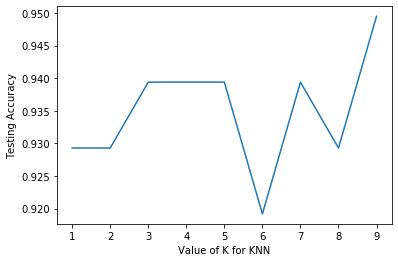

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.40,random_state=1)

print(X_train.shape)
print(X_test.shape)

k_range = range(1,10,1)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)


# allow plots to appear within the notebook
%matplotlib inline


plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Naive Bayes

Accuracy: 0.8161434977578476


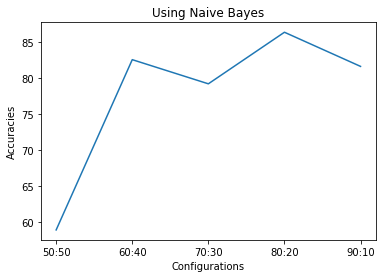

In [8]:

sizes = [0.5,0.6,0.7,0.8,0.9]
accuracy_1 = []
# Split dataset into training set and test set
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=size,random_state=1)
    gnb.fit(X_train,y_train)
    Y_predict = gnb.predict(X_test)
    accuracy_1.append(metrics.accuracy_score(y_test,Y_predict)*100)

#Train the model using the training sets
gnb.fit(X_train, y_train)
config = ['50:50','60:40','70:30','80:20','90:10']
#Predict the response for test dataset
y_pred = gnb.predict(X_test)
fig, ax1 = plt.subplots(1,1)
ax1.plot(config,accuracy_1)
ax1.set(xlabel = 'Configurations', ylabel = 'Accuracies')
ax1.set_title('Using Naive Bayes')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# SVM

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.40,random_state=1)

#print
print(X_train.shape)
print(X_test.shape)

# encoding train labels 
encoder.fit(y_train)
Y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
Y_test = encoder.transform(y_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))


print("Accuracy:",metrics.accuracy_score(y_test, Y_pred_label))

(148, 2)
(99, 2)
Accuracy: 0.3939393939393939


In [10]:
y=label
y = encoder.fit_transform(y)
scaler.fit(features)
X = scaler.transform(features)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.38666666666666666


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,label, test_size=0.4,random_state=1)
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.3939393939393939


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,label, test_size=0.5,random_state=1)
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.3951612903225806


In [13]:
svc=SVC(kernel='linear')
scores = cross_val_score(svc,X,label, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.4   0.4   0.4   0.4   0.36  0.36  0.36  0.375 0.375 0.375]


In [14]:
print(scores.mean())

0.3805


In [15]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X,label, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.4   0.4   0.4   0.4   0.36  0.36  0.36  0.375 0.375 0.375]


In [16]:
print(scores.mean())

0.3805


In [17]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X,label,  cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.4   0.4   0.4   0.4   0.36  0.36  0.36  0.375 0.375 0.375]


In [18]:
print(scores.mean())

0.3805


In [19]:

C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X,y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  


[0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805]


Text(0, 0.5, 'Cross-Validated Accuracy')

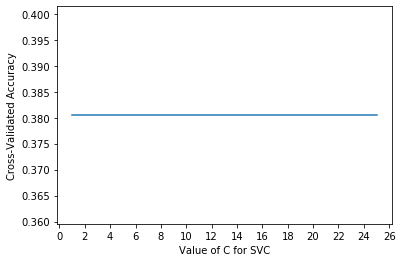

In [20]:

C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [21]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805, 0.3805]


Text(0, 0.5, 'Cross-Validated Accuracy')

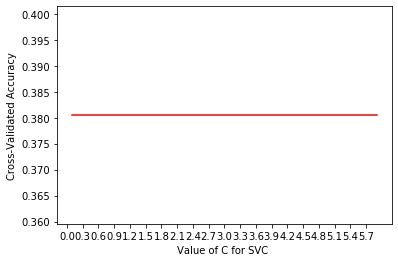

In [22]:

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score,color='r')
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

# Visualization

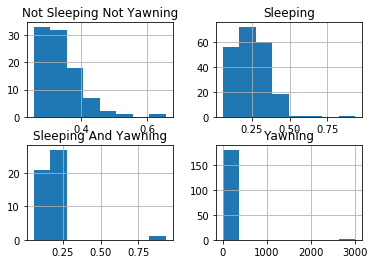

In [23]:
data=pd.read_csv('facial_image_ar.csv',sep=';')
sleep_ds=data.loc[data['Class'].str.contains('sleeping')]#particular label
yawn_ds=data.loc[data['Class'].str.contains('yawning')]
both_ds=data.loc[data['Class'].str.contains('sleeping and yawning')]
not_ds=data.loc[data['Class'].str.contains('not sleeping not yawning')]
s=sleep_ds['Eye-Aspect-Ratio']
y=yawn_ds['Eye-Aspect-Ratio']
b=both_ds['Eye-Aspect-Ratio']
n=not_ds['Eye-Aspect-Ratio']
info = pd.DataFrame({  
'Sleeping': s,
'Yawning': y,
    
'Sleeping And Yawning': b,
'Not Sleeping Not Yawning': n

})  
ax = info.hist(bins=8)  



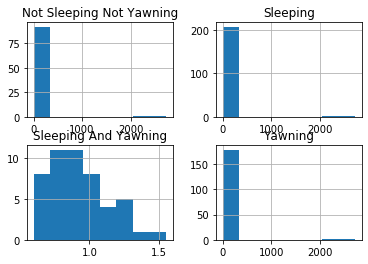

In [24]:
sleep_ds=data.loc[data['Class'].str.contains('sleeping')]#particular label
yawn_ds=data.loc[data['Class'].str.contains('yawning')]
both_ds=data.loc[data['Class'].str.contains('sleeping and yawning')]
not_ds=data.loc[data['Class'].str.contains('not sleeping not yawning')]
sm=sleep_ds['Mouth-Aspect-Ratio']
ym=yawn_ds['Mouth-Aspect-Ratio']
bm=both_ds['Mouth-Aspect-Ratio']
nm=not_ds['Mouth-Aspect-Ratio']
info = pd.DataFrame({  
'Sleeping': sm,
'Yawning': ym,
'Sleeping And Yawning': bm,
'Not Sleeping Not Yawning': nm

})  
ax = info.hist(bins=8)  


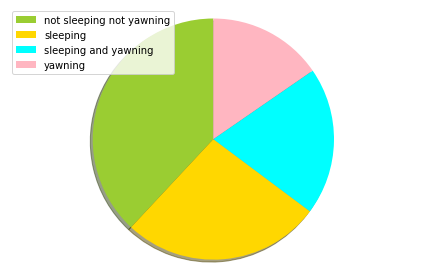

In [25]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=data["Class"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome
temp = data["Class"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# State Dataset

In [26]:
df = pd.read_csv('roadAccStats13-16.csv')
df

,SI. No.,States/UTs,State/UT-Wise Total Number of Road Accidents during - 2013,State/UT-Wise Total Number of Road Accidents during - 2014,State/UT-Wise Total Number of Road Accidents during - 2015,State/UT-Wise Total Number of Road Accidents during - 2016,Share of States/UTs in Total Number of Road Accidents - 2013,Share of States/UTs in Total Number of Road Accidents - 2014,Share of States/UTs in Total Number of Road Accidents - 2015,Share of States/UTs in Total Number of Road Accidents - 2016,Total Number of Accidents Per Lakh Population - 2013,Total Number of Accidents Per Lakh Population - 2014,Total Number of Accidents Per Lakh Population - 2015,Total Number of Accidents Per Lakh Population - 2016,"Total Number of Road Accidents per 10,000 Vehicles - 2013","Total Number of Road Accidents per 10,000 Vehicles - 2014","Total Number of Road Accidents per 10,000 Vehicles - 2015","Total Number of Road Accidents per 10,000 Km of Roads - 2013","Total Number of Road Accidents per 10,000 Km of Roads - 2014","Total Number of Road Accidents per 10,000 Km of Roads - 2015"
0,1,Andhra Pradesh,43482.0,24440,24258,24888,8.9,5.0,4.8,5.2,50.4,28.1,27.7,28.2,34.3,34.9,30.8,1661.8,1372.3,1355.0
1,2,Arunachal Pradesh,308.0,205,284,249,0.1,0.0,0.1,0.1,24.3,16.0,21.9,19.0,20.4,13.6,18.8,109.6,83.8,112.0
2,3,Assam,7211.0,7144,6959,7435,1.5,1.5,1.4,1.5,23.0,22.5,21.7,22.9,38.4,32.2,27.7,250.3,227.8,213.1
3,4,Bihar,10200.0,9556,9555,8222,2.1,2.0,1.9,1.7,10.2,9.4,9.3,7.9,28.2,23.0,20.0,517.1,455.6,463.8
4,5,Chhattisgarh,13657.0,13821,14446,13580,2.8,2.8,2.9,2.8,54.8,54.8,56.5,52.5,39.7,35.7,33.5,1530.4,1461.3,1481.1
5,6,Goa,4294.0,4229,4338,4304,0.9,0.9,0.9,0.9,229.9,220.8,222.1,217.7,45.8,41.9,40.0,3702.2,3187.6,2966.4
6,7,Gujarat,25391.0,23712,23183,21859,5.2,4.8,4.6,4.5,41.9,38.7,37.3,34.8,16.1,13.9,12.4,1532.9,1324.2,1271.8
7,8,Haryana,10482.0,10676,11174,11234,2.2,2.2,2.2,2.3,39.9,40.0,41.3,40.9,15.9,14.7,14.1,2467.7,2501.1,2414.1
8,9,Himachal Pradesh,2981.0,3058,3010,3168,0.6,0.6,0.6,0.7,43.1,43.8,42.8,44.7,34.0,31.4,27.9,560.1,562.3,541.4
9,10,Jammu & Kashmir,6457.0,5861,5836,5501,1.3,1.2,1.2,1.1,53.8,48.2,47.5,44.3,63.3,51.7,46.9,1447.9,1498.7,1492.7


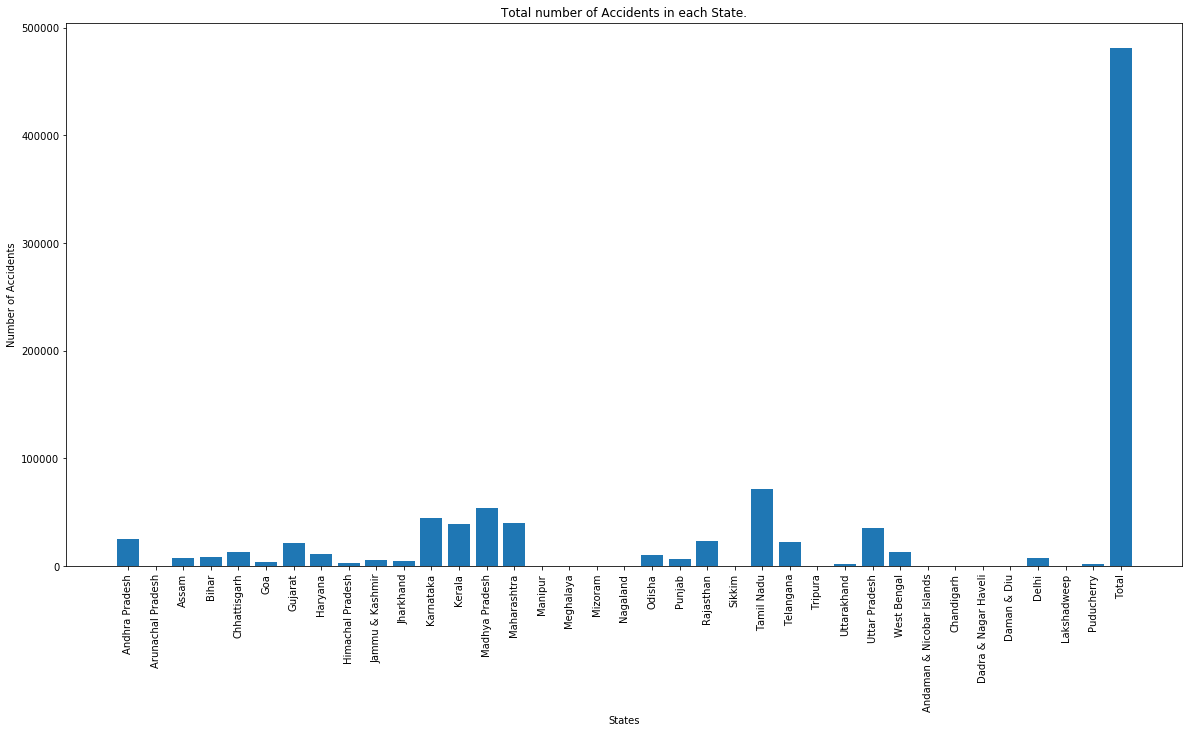

In [27]:

plt.figure(figsize = (20,10))
y = df['State/UT-Wise Total Number of Road Accidents during - 2016']
yd = df['States/UTs']
p =df['States/UTs'].nunique()
d = np.linspace(1,p,p)   
plt.bar(d, y, align = 'center')
plt.xticks(d, yd, rotation = 90)
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.title('Total number of Accidents in each State.')
plt.show()